In [12]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
#Cargamos nuestro df y estudiamos sus columnas
df = pd.read_csv('../data/raw/wine-quality-white-and-red.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

# Observamos la distibución de nuestro target

In [16]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

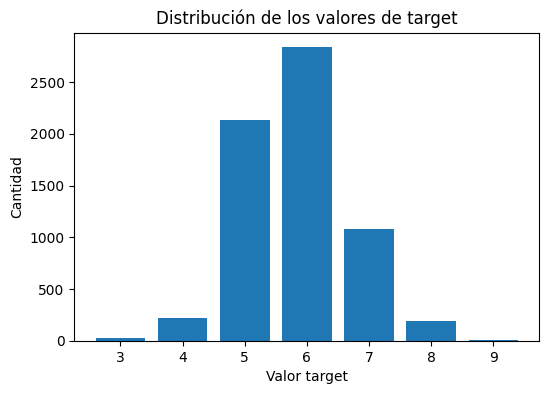

In [17]:
plt.figure(figsize=(6, 4))
plt.bar(df['quality'].value_counts().index,df['quality'].value_counts())
plt.xlabel('Valor target')
plt.ylabel('Cantidad')
plt.title('Distribución de los valores de target')
plt.show()

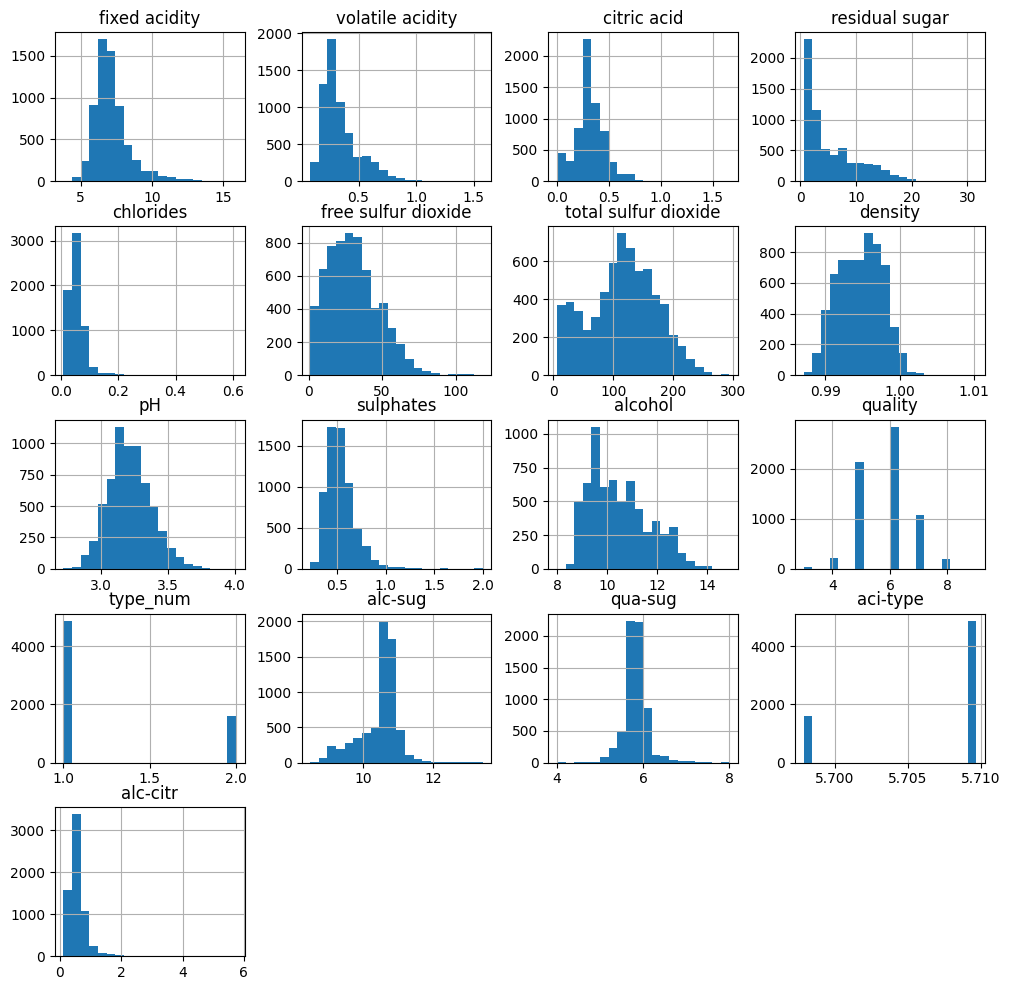

In [33]:
df.hist(bins=20, figsize=(12, 12))
plt.show()

# Creamos nuevas variables para intentar mejorar la correlacion 

In [19]:
# Damos valores numericos al tipo de vino
df['type_num'] = df['type'].map({'white': 1, 'red': 2})

In [20]:
# Calculamos la media de 'alcohol' asociada a cada valor de 'residual sugar'
med_alc_sug = df.groupby('residual sugar')['alcohol'].mean()

df['alc-sug'] = df['residual sugar'].map(med_alc_sug)

In [21]:
# Calculamos la media de 'Quality' asociada a cada valor de 'residual sugar'
med_qua_sug = df.groupby('residual sugar')['quality'].mean()

df['qua-sug'] = df['residual sugar'].map(med_qua_sug)

In [22]:
# Calculamos la media de 'volatile acidity' asociada a cada valor de 'type_num'
med_chlo_aci= df.groupby('type_num')['volatile acidity'].mean()

df['aci-type'] = df['type_num'].map(med_qua_sug)

In [23]:
# Asociamos los valores de alcohol con chlorides
df['alc-citr'] = df['alcohol'] * df['chlorides']

# Eliminamos los outliers

In [24]:
df = df[df['total sulfur dioxide'] < 300]

In [25]:
df = df[df['free sulfur dioxide'] < 120]

In [26]:
df = df[df['residual sugar'] < 50]

In [27]:
#Eliminamos la columna type

df.drop(columns='type', inplace=True)

# Guardamos el dataframe ya procesado

In [28]:
#Guardamos el dataframe ya procesado
df.to_csv('../data/processed.csv', index=False)

In [29]:
# Cargamos el dataframe procesado
df2= pd.read_csv('../data/processed.csv')
df2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6481            6.2             0.600         0.08             2.0      0.090   
6482            5.9             0.550         0.10             2.2      0.062   
6483            6.3             0.510         0.13             2.3      0.076   
6484            5.9             0.645         0.12             2.0      0.075   
6485            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6481                 32.0                  44.0  0.99490  3.45       0.58   
6482                 39.0                  51.0  0.99512  3.52       0.76   
6483                 29.0                  40.0  0.99574  3.42       0.75   
6484                 32.0                  44.0  0.99547  3.57       0.71   
6485                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  type_num    alc-sug   qua-sug  aci-type  alc-citr  
0         8.8        6         1   8.800000  6.000000  5.709677    0.3960  
1         9.5        6         1  10.666592  5.784753  5.709677    0.4655  
2        10.1        6         1  10.370000  6.000000  5.709677    0.5050  
3         9.9        6         1  10.129167  5.750000  5.709677    0.5742  
4         9.9        6         1  10.129167  5.750000  5.709677    0.5742  
...       ...      ...       ...        ...       ...       ...       ...  
6481     10.5        5         2  10.605532  5.697872  5.697872    0.9450  
6482     11.2        6         2  10.672460  5.812834  5.697872    0.6944  
6483     11.0        6         2  10.717219  5.788079  5.697872    0.8360  
6484     10.2        5         2  10.605532  5.697872  5.697872    0.7650  
6485     11.0        6         2  11.210000  6.133333  5.697872    0.7370  

[6486 rows x 17 columns]

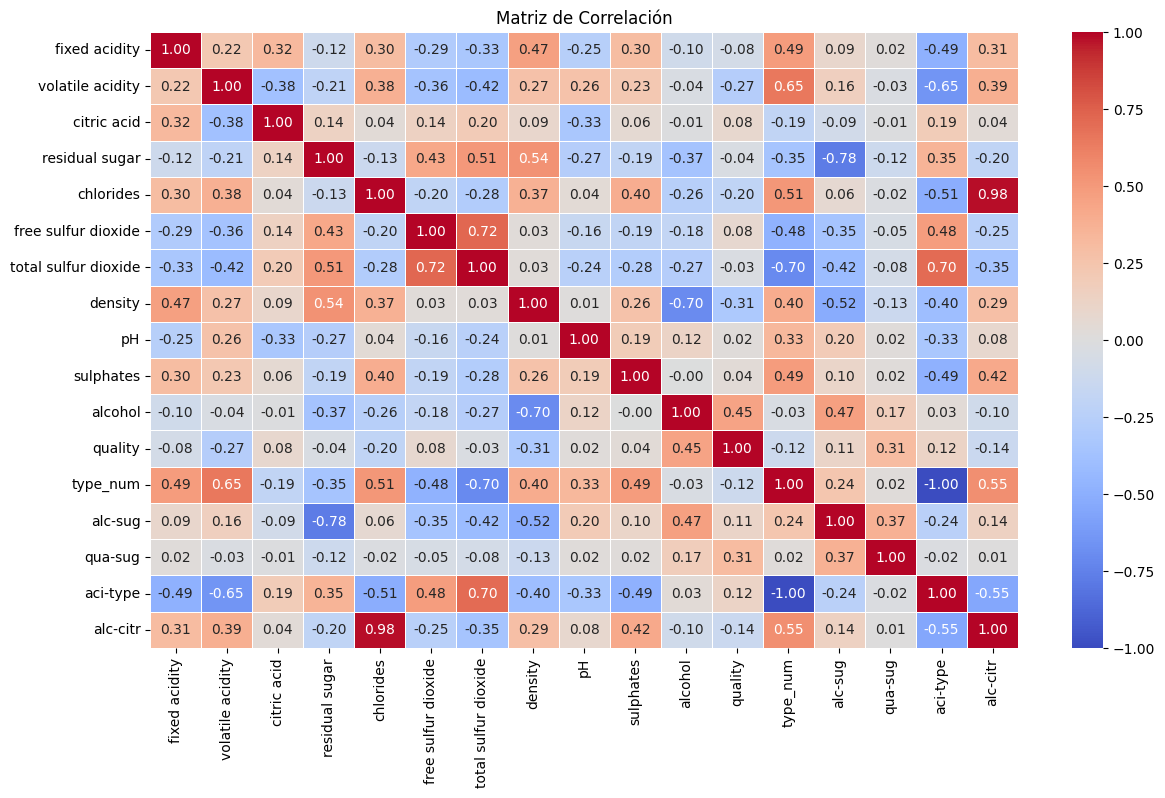

In [30]:
#Visualizamos la matriz de correlacion de las variables
plt.figure(figsize=(14, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

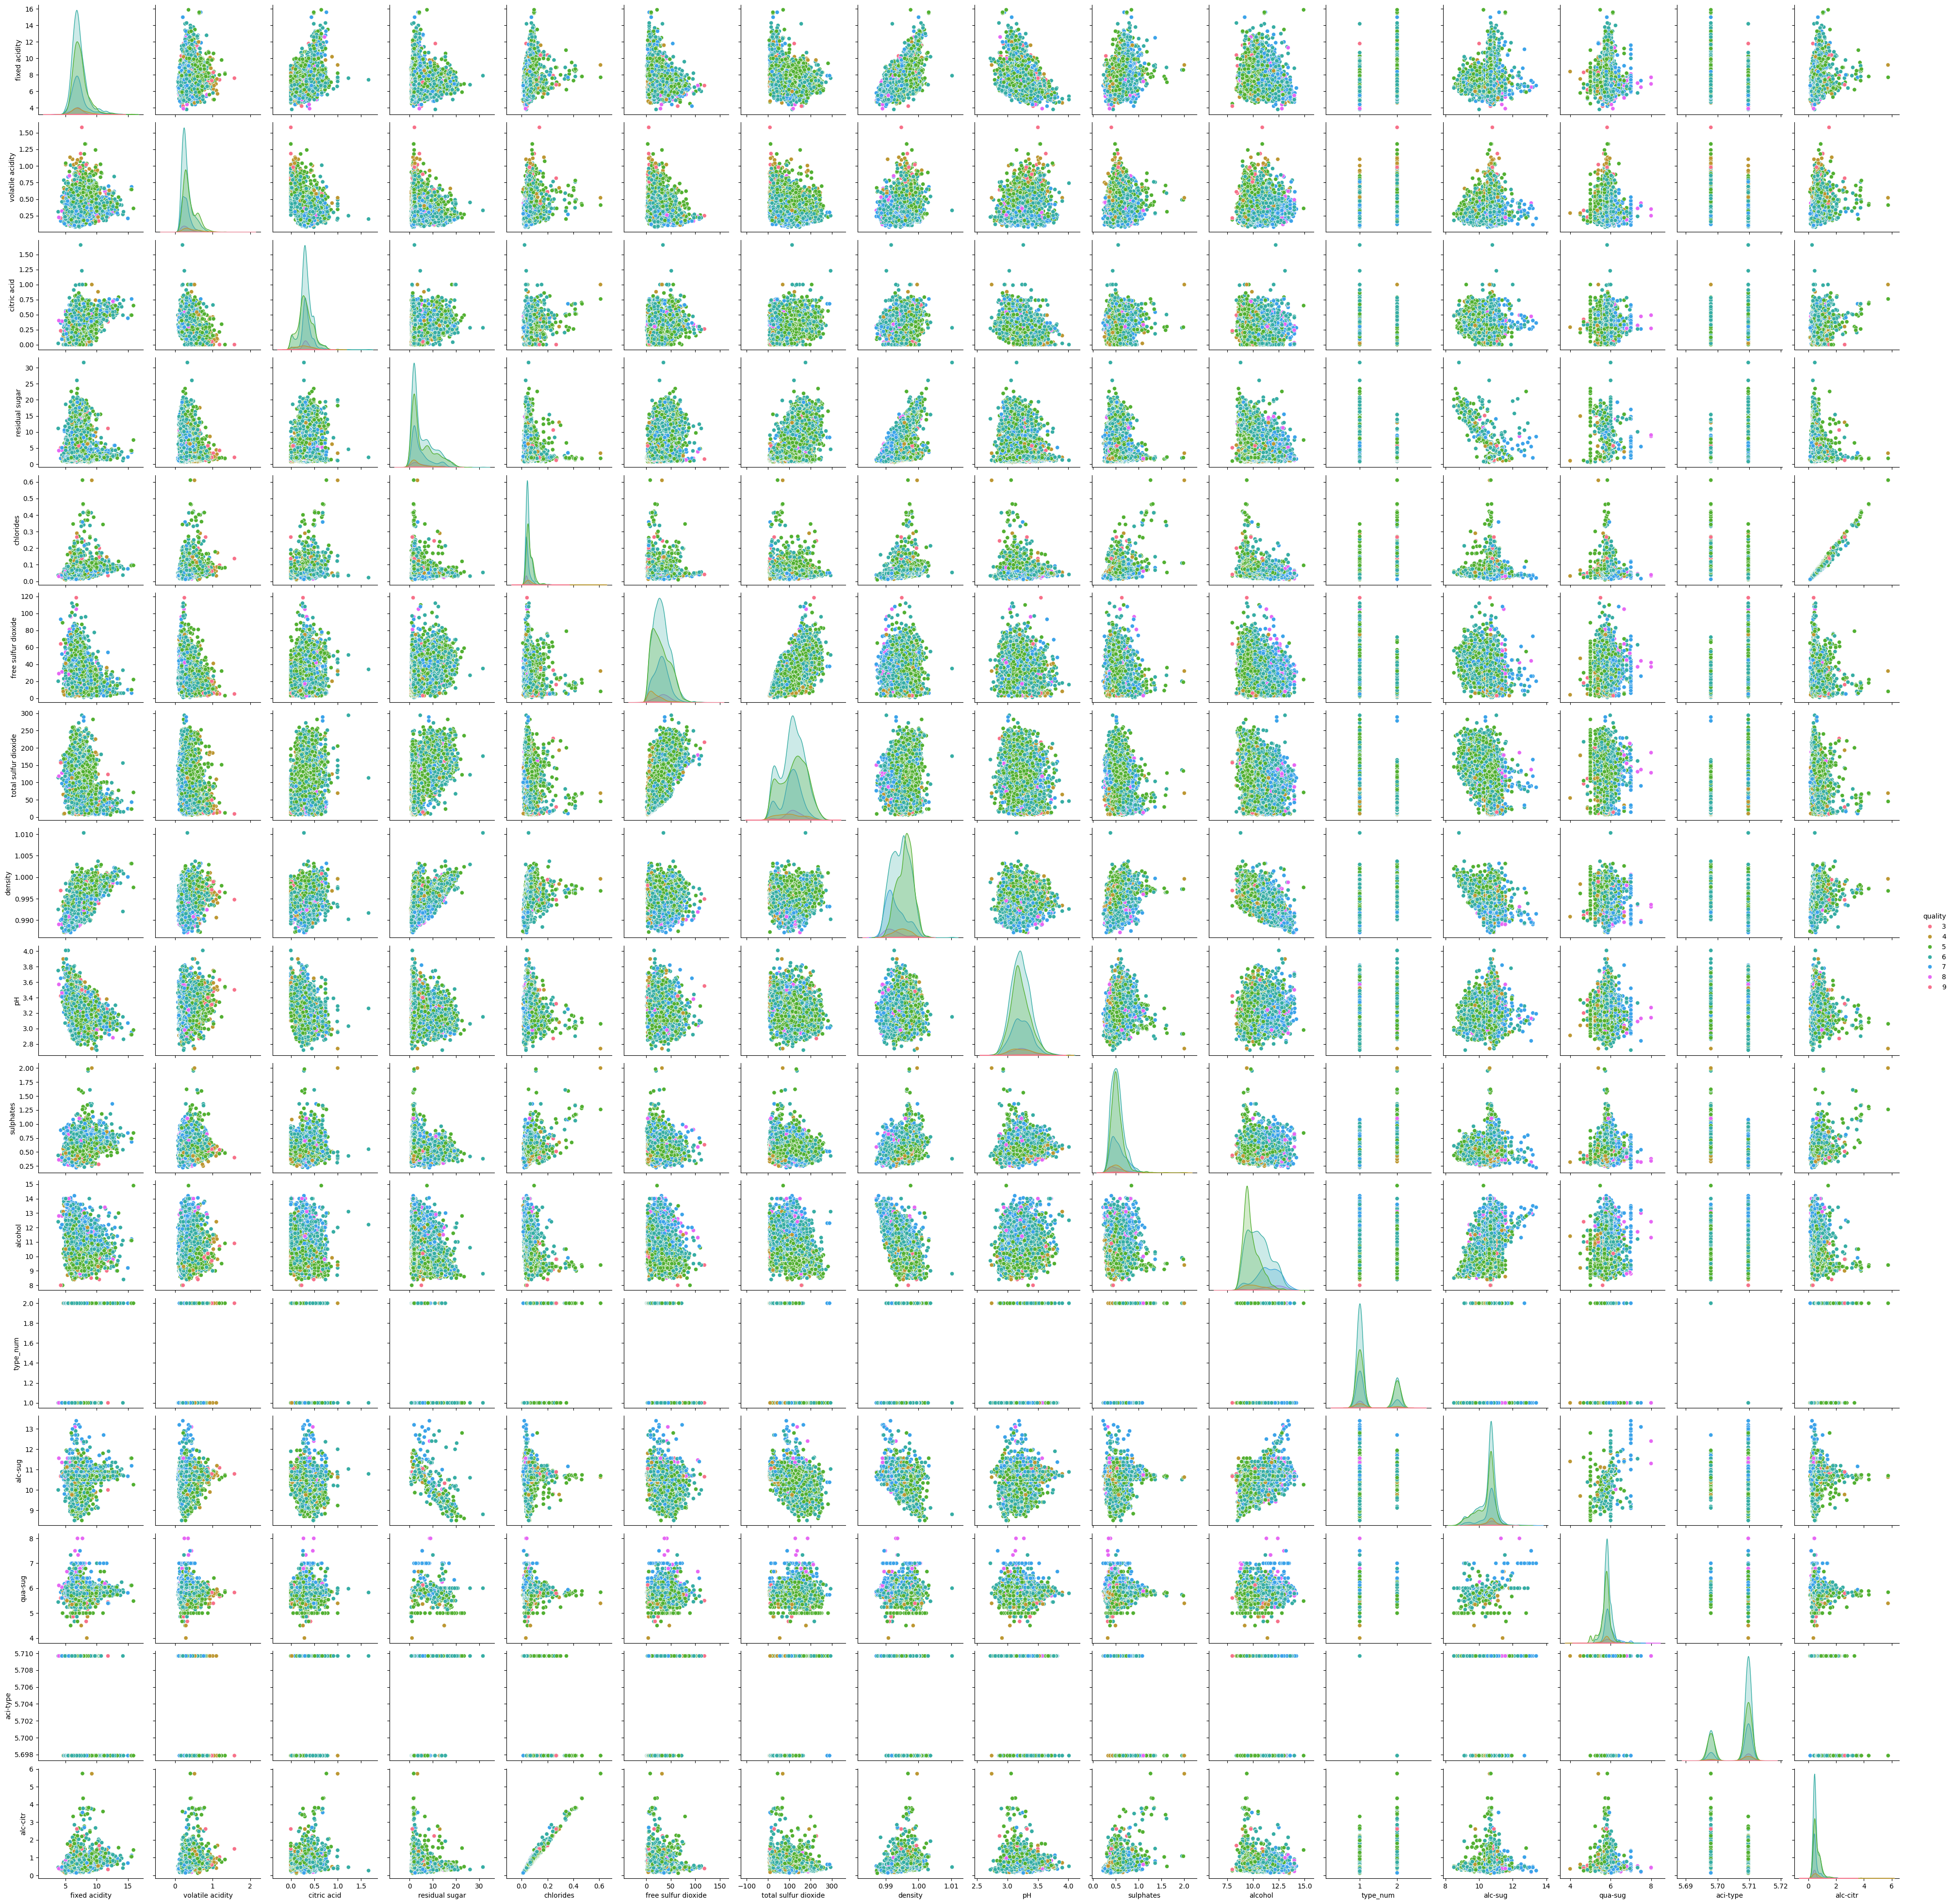

In [31]:
#Visualizamos el pairplot con los valores de cada variable de quality
sns.pairplot(df2, hue='quality', palette="husl")

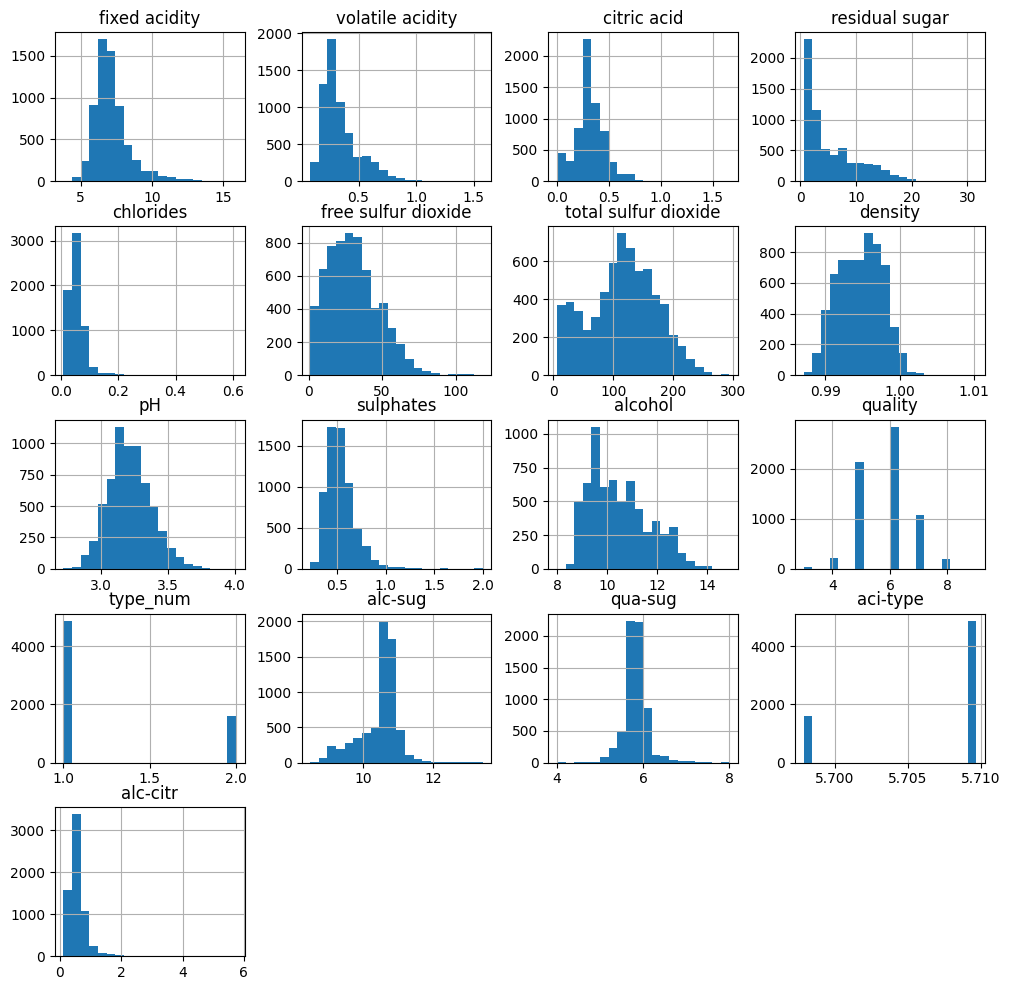

In [34]:
df2.hist(bins=20, figsize=(12, 12))
plt.show()

## Vamos a observar la correlacion de sus variables

In [36]:
df2.corrwith(df2['quality']).abs().sort_values(ascending=False)[1:]

alcohol                 0.446157
density                 0.312817
qua-sug                 0.307974
volatile acidity        0.267140
chlorides               0.202245
alc-citr                0.137735
type_num                0.121679
aci-type                0.121679
alc-sug                 0.112989
citric acid             0.084765
free sulfur dioxide     0.077363
fixed acidity           0.076340
sulphates               0.038305
residual sugar          0.037532
total sulfur dioxide    0.030893
pH                      0.019498
dtype: float64

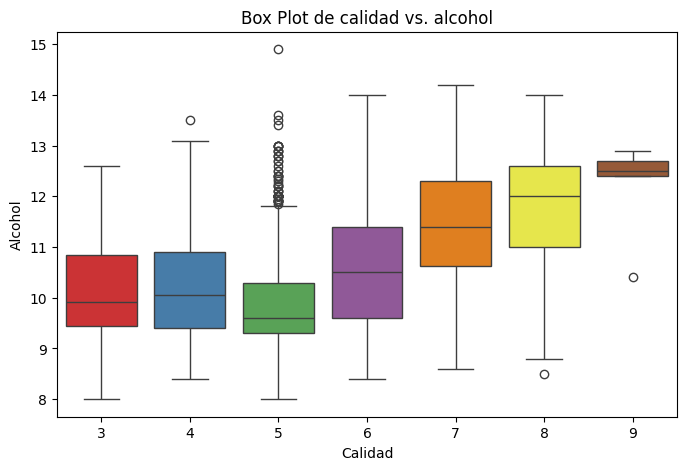

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol',hue='quality',data=df2, palette='Set1', legend=False)
plt.title("Box Plot de calidad vs. alcohol")
plt.xlabel("Calidad")
plt.ylabel("Alcohol")
plt.show()

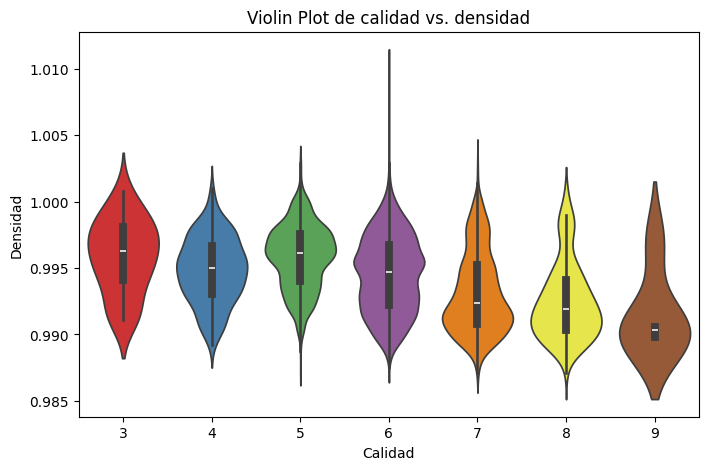

In [57]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='quality', y='density',hue='quality',data=df2, palette='Set1', legend=False)
plt.title("Violin Plot de calidad vs. densidad")
plt.xlabel("Calidad")
plt.ylabel("Densidad")
plt.show()

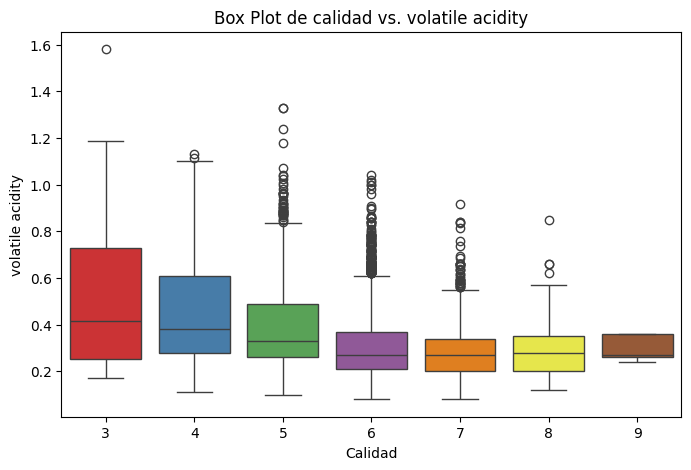

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='volatile acidity',hue='quality',data=df2, palette='Set1', legend=False)
plt.title("Box Plot de calidad vs. volatile acidity")
plt.xlabel("Calidad")
plt.ylabel("volatile acidity")
plt.show()

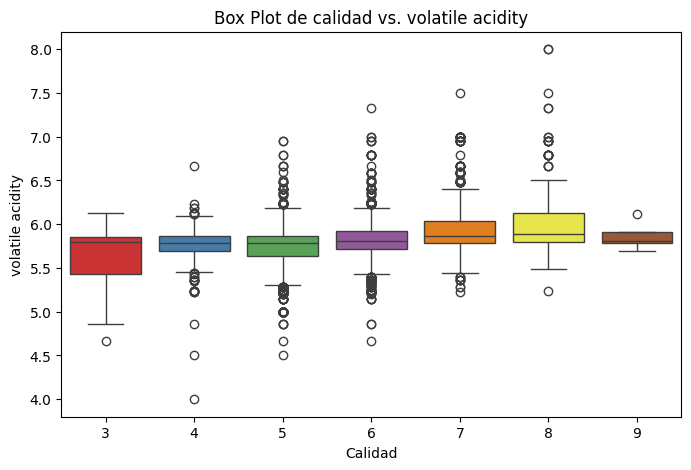

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='qua-sug',hue='quality',data=df2, palette='Set1', legend=False)
plt.title("Box Plot de calidad vs. volatile acidity")
plt.xlabel("Calidad")
plt.ylabel("volatile acidity")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
#Separamos el dataframe en train y test y lo guardamos en .csv
train, test = train_test_split(df, test_size=0.2, random_state=42)

train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)